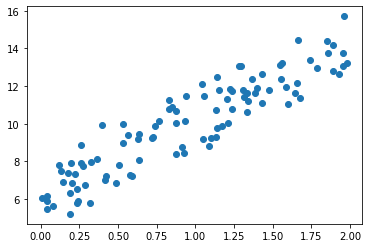

In [30]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

np.random.seed(0)
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

#x,y 데이터 셋 scatter plot 으로 시각화 
plt.scatter(X,y)

In [31]:
X.shape, y.shape
#동적으로 할당된 array 에 대해서 몇행, 몇열 행렬로 구성되었는지 알아야 할 경우
#shape[0], shape[1]를 이용하여 전체 행의 갯수와 열의 갯수

((100, 1), (100, 1))

### 사이킥 런이 아닌 날코딩으로 해보는 경사하강법
 p. 251

In [35]:
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01): 
    N = len(y)
    #먼저 w1_update, W0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화 
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    #예측 배열 계산하고 예측과 실제 값의 차이 계산 
    y_pred = np.dot(X, w1.T) +w0
    diff = y - y_pred

    #W0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    #w1과 w0을 업데이트 할 w1_update와 w0_update계산 (즉, 미분하는 식 ) 
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [36]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000) :
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여
    # w1, w0 업데이트 수행
    for ind in range(iters) :
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

w1:4.862 w0:5.058
Gradient Descent Total Cost:1.3596


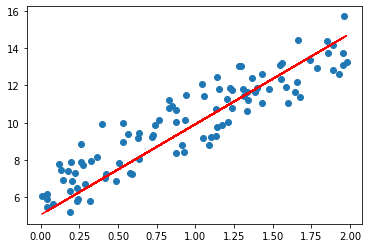

In [37]:
def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N  # 오차값 #square = ass 
    return cost
w1, w0 = gradient_descent_steps(X, y, iters=100) #iters를 바꾸다 보면 어느순간 값이 커져도 크게 변화가 없다. 이럴때 for문 돌려서 언제가 제일 좋은지 확인할 수 있다. 
print(f"w1:{w1[0,0]:.3f} w0:{w0[0,0]:.3f}")
y_pred = w1[0,0]*X + w0
print(f"Gradient Descent Total Cost:{get_cost(y, y_pred):.4f}")
#Gradient Descent Total Cost = RSS 
plt.scatter(X, y)
plt.plot(X, y_pred, c="r")

In [38]:
#샘플링으로 데이터를 추출하여 시간 단축 

def stochastic_gradient_descent_steps(X,y, batch_size =10, iters = 1000):
    #배치사이즈를 10을 줌 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 10000
    iter_index = 0

    #tiers에 1000들어감 
    for ind in range(iters):
        np.random.seed(ind)
        #randomseed 0 들어감 
        #전체 x, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_x, sample_y로 저장 
        stochastic_random_index = np.random.permutation(X.shape[0]) #shape는 행렬을 만드는데 permutation은 140개의ㅡ 행렬을 랜덤으로 배치시킨다. 5,3,1,2 라고 만들어준다. 배열하니 
        sample_X = X[stochastic_random_index[0:batch_size]] #이 배열에 배치사이즈가 10이면 0부터 얼마까지 첫열부터 10개의 숫자를 [18, 29, 64, 92, 72, 87,  5, 15, 12, 17, 61..]가 x에 들어간다. 
        sample_y = y[stochastic_random_index[0:batch_size]] #batch_size가 의미하는 것? 학습을 시킬때 엔포크란 개념이 나오는데 엔포크를늘려라는 말은 자료의 총 개수인 1000개를 1바퀴돌린게 1에포크 미니베치는 확률 경사함법은 작은 사이즈를 가지고 확률을 해보겠다는 거다 
        #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, wo_update계산 후 업데이트 
        #총 10개의 레이블 값만 가지고 확률 구함 
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0
    #확률적 경사 하강법을 하드코딩 해본 것이다. 

    #즉 미니배치는 바로 구하지 않고 조금만 뽑아서 확률을 구해보겠다는 것 
    #sample_X, sample_y 값은 배치사이즈가 들어간 것이다.

In [41]:
w1,w0

(array([[4.02826291]]), array([[6.15645891]]))

In [39]:
np.random.permutation(X.shape[0])

array([66, 71, 54, 88, 82, 12, 36, 46, 14, 67, 10,  3, 62, 29, 97, 69, 70,
       93, 31, 73, 60, 96, 28, 27, 21, 19, 33, 78, 32, 94,  1, 41, 40, 76,
       37, 87, 24, 23, 50,  2, 47, 20, 77, 17, 56, 64, 68, 25, 15, 22, 16,
       98, 63, 92, 86, 38,  6, 57, 95, 44,  9, 42, 81, 99, 35, 84, 59, 48,
       75, 65, 85, 90, 55, 43, 58, 89, 30, 80, 34, 18, 51, 49, 52, 74, 26,
       45, 39,  4, 11, 53, 91, 79,  8,  0,  5, 13, 61, 72,  7, 83])

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Coast: 0.993711


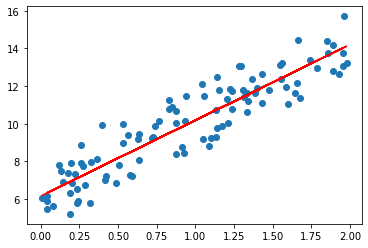

In [45]:
#배치사이즈가 위에서 10이라고 함 
#1000 데이터가 있으면 배치사이즈가 10이면 총 100번 대입한다 이게 1에포크다. 

w1,w0 = stochastic_gradient_descent_steps(X,y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Coast:{0: 4f}'.format(get_cost(y,y_pred)))
plt.scatter(X, y)
plt.plot(X, y_pred, c="r")